In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

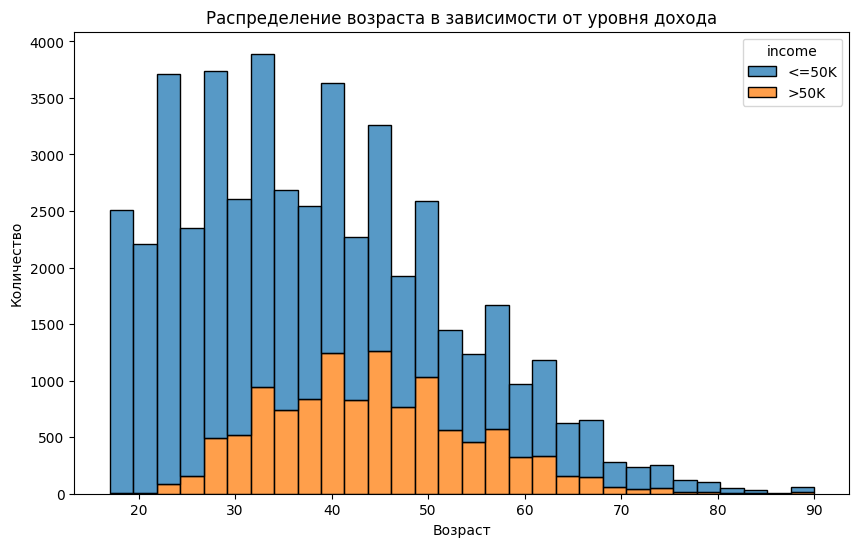

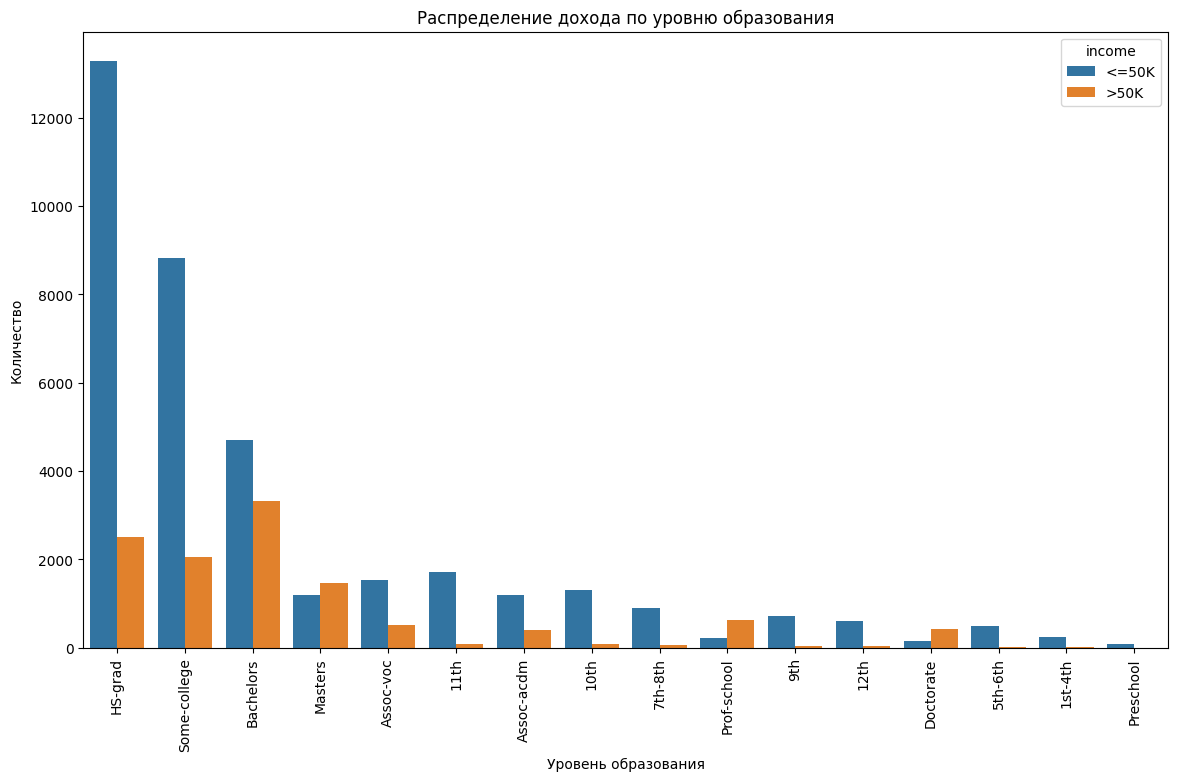

   age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336951               12             0             0              40   
3   44  160323               10          7688             0              40   
4   18  103497               10             0             0              30   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                  False                False                   False   
1                  False                False                   False   
2                  False                 True                   False   
3                  False                False                   False   
4                  False                False                   False   

   workclass_Private  ...  native-country_Puerto-Rico  \
0               True  ...    

In [2]:
# Загрузка данных и первичный анализ

df = pd.read_csv('adult.csv')

print(df.head())
print(df.info())
print(df.describe(include='all'))

# Проверка на пропуски
missing_values = df.isnull().sum()
print("Пропущенные значения в каждом столбце:\n", missing_values)

# Визуализация данных

# График 1: Распределение возраста в зависимости от уровня дохода
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='income', multiple='stack', bins=30)
plt.title('Распределение возраста в зависимости от уровня дохода')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

# График 2: Распределение дохода по уровню образования
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='education', hue='income', order=df['education'].value_counts().index)
plt.title('Распределение дохода по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество')
plt.xticks(rotation=90)
plt.show()


# Преобразование категориальных признаков в числовые и удаление первых столбцов
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.head())


# Проверка количества признаков
num_features = df_encoded.shape[1] - 1  # Вычитаем 1, так как последний столбец - это целевая переменная
print(f"\nКоличество признаков после One-Hot Encoding: {num_features}")

# Проверка размерности данных
print(f"\nРазмер данных после One-Hot Encoding: {df_encoded.shape}")

# Определим целевую переменную и признаки
X = df_encoded.drop('income_>50K', axis=1)
y = df_encoded['income_>50K']

# Разделение данных на обучающее и тестовое множества
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [3]:
# Создание модели логистической регрессии с использованием пайплайна
log_reg_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

# Обучение модели на тренировочных данных
log_reg_pipeline.fit(X_train, y_train)

# Предсказание на тестовых данных
predictions_log_reg = log_reg_pipeline.predict(X_test)

# Оценка точности модели с использованием метода score
log_reg_score_train = log_reg_pipeline.score(X_train, y_train)
log_reg_score_test = log_reg_pipeline.score(X_test, y_test)

print(f'Точность логистической регрессии на обучающих данных: {log_reg_score_train}')
print(f'Точность логистической регрессии на тестовых данных: {log_reg_score_test}')

Точность логистической регрессии на обучающих данных: 0.854221585237888
Точность логистической регрессии на тестовых данных: 0.8498310983724024


In [4]:
# Создание модели метода опорных векторов с радиально-базисным ядром с использованием пайплайна
svc_rbf_pipeline = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf')
)

# Обучение модели на тренировочных данных
svc_rbf_pipeline.fit(X_train, y_train)

# Предсказание на тестовых данных
predictions_svc_rbf = svc_rbf_pipeline.predict(X_test)

# Оценка точности модели с использованием метода score
svc_rbf_score_train = svc_rbf_pipeline.score(X_train, y_train)
svc_rbf_score_test = svc_rbf_pipeline.score(X_test, y_test)

print(f'Точность метода опорных векторов на обучающих данных: {svc_rbf_score_train}')
print(f'Точность метода опорных векторов на тестовых данных: {svc_rbf_score_test}')

Точность метода опорных векторов на обучающих данных: 0.8621042663731989
Точность метода опорных векторов на тестовых данных: 0.8491145460128979
